In [1]:
import sys
sys.path.append('../src')

import torch
import torch.nn as nn
import torch.optim as optim
import pickle

from data_loader import load_data
from embeddings import load_pretrained_vocab,load_pretrained_embeddings
from models import RNNModel
from utils import train_model, evaluate_model


/Users/haoyangpang/Desktop/Y3S1/SC4002 Natural Language Processing/assignment/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/haoyangpang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
device = torch.device('mps' if torch.mps.is_available() else 'cpu')
print(f"Using device: {device}")


Using device: mps


In [3]:
import os
print(os.getcwd())  
os.chdir('/Users/haoyangpang/Desktop/Y3S1/SC4002 Natural Language Processing/assignment')

/Users/haoyangpang/Desktop/Y3S1/SC4002 Natural Language Processing/assignment/notebooks


In [4]:
# Load the saved vocabulary
with open('vocab.pkl', 'rb') as f:
    vocab = pickle.load(f)


In [5]:
# Set parameters
batch_size = 32
max_len = 100

# Load data loaders
train_loader, val_loader, test_loader, _ = load_data(batch_size, max_len)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/haoyangpang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
embedding_dim = 300
embedding_file = 'glove.6B.300d.txt'

# Load embedding matrix
embedding_matrix = load_pretrained_embeddings(vocab, embedding_dim, embedding_file)


In [7]:
hidden_size = 256
output_size = 2  # Positive or Negative sentiment

model = RNNModel(embedding_matrix, hidden_size, output_size)
model.to(device)


RNNModel(
  (embedding): Embedding(15813, 300)
  (rnn): RNN(300, 256, num_layers=2, batch_first=True)
  (fc): Linear(in_features=256, out_features=2, bias=True)
)

In [15]:
# Adjust learning rate and add gradient clipping
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss()

# Add gradient clipping to your training loop
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

tensor(0.)

In [16]:
num_epochs = 10
train_losses, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, num_epochs, device
)

print("Training losses:", train_losses)
print("Validation accuracies:", val_accuracies)


Epoch 1/10: 100%|██████████| 267/267 [00:18<00:00, 14.66it/s]


Epoch 1/10, Loss: 0.7038, Val Acc: 0.5000


Epoch 2/10: 100%|██████████| 267/267 [00:17<00:00, 14.95it/s]


Epoch 2/10, Loss: 0.6997, Val Acc: 0.5000


Epoch 3/10: 100%|██████████| 267/267 [00:18<00:00, 14.73it/s]


Epoch 3/10, Loss: 0.6975, Val Acc: 0.5019


Epoch 4/10: 100%|██████████| 267/267 [00:17<00:00, 14.85it/s]


Epoch 4/10, Loss: 0.7005, Val Acc: 0.5000


Epoch 5/10: 100%|██████████| 267/267 [00:17<00:00, 14.87it/s]


Epoch 5/10, Loss: 0.6994, Val Acc: 0.5000


Epoch 6/10: 100%|██████████| 267/267 [00:17<00:00, 14.86it/s]


Epoch 6/10, Loss: 0.7035, Val Acc: 0.5000


Epoch 7/10: 100%|██████████| 267/267 [00:18<00:00, 14.80it/s]


Epoch 7/10, Loss: 0.7100, Val Acc: 0.5000


Epoch 8/10: 100%|██████████| 267/267 [00:17<00:00, 14.86it/s]


Epoch 8/10, Loss: 0.7028, Val Acc: 0.5000


Epoch 9/10: 100%|██████████| 267/267 [00:18<00:00, 14.80it/s]


Epoch 9/10, Loss: 0.7038, Val Acc: 0.5000


Epoch 10/10: 100%|██████████| 267/267 [00:17<00:00, 14.85it/s]


Epoch 10/10, Loss: 0.7010, Val Acc: 0.5000
Best Validation Accuracy: 0.5019
Training losses: [0.7037894001879139, 0.6996562555694357, 0.6974537627079282, 0.7004900479931625, 0.6993703517377167, 0.7034517544794474, 0.7099669351108189, 0.7027523062712702, 0.7038282879911022, 0.7010169229921115]
Validation accuracies: [0.5, 0.5, 0.50187617260788, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


## Question 2(a): Report the final configuration of your best model


Ans: Answer:

Number of Training Epochs: 10
Learning Rate: 0.001
Optimizer: Adam
Batch Size: 32

In [17]:
!pip install matplotlib

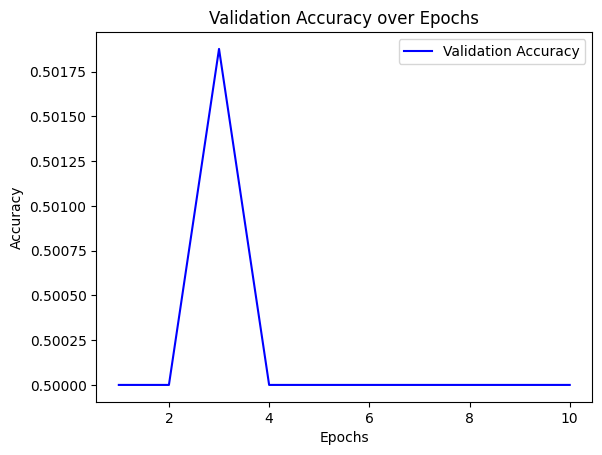

In [18]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)
plt.plot(epochs, val_accuracies, 'b', label='Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [19]:
# Load the best model
model.load_state_dict(torch.load('best_model.pt'))

# Evaluate on test set
test_accuracy = evaluate_model(model, test_loader, device)
print(f"Test Accuracy: {test_accuracy:.4f}")


/var/folders/s4/t6kz6qx12y73h21vglf5plvm0000gn/T/ipykernel_79422/1245242132.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.

Test Accuracy: 0.5019


## Question 2(b): Report the accuracy score on the test set and validation set for each epoch during training

Ans: Refer to cell 9

In [21]:
# Initialize the model again
model_avg = RNNModel(embedding_matrix, hidden_size, output_size)
model_avg.to(device)

# Create a new optimizer for the new model
optimizer_avg = optim.Adam(model_avg.parameters(), lr=0.001, weight_decay=1e-5)

# Train the model with the new optimizer
train_losses, val_accuracies = train_model(
    model_avg, train_loader, val_loader, criterion, optimizer_avg, num_epochs, device
)

# Evaluate on test set
model_avg.load_state_dict(torch.load('best_model.pt'))
test_accuracy_avg = evaluate_model(model_avg, test_loader, device)
print(f"Test Accuracy with Average Pooling: {test_accuracy_avg:.4f}")

Epoch 1/10: 100%|██████████| 267/267 [00:18<00:00, 14.79it/s]


Epoch 1/10, Loss: 0.7760, Val Acc: 0.5000


Epoch 2/10: 100%|██████████| 267/267 [00:18<00:00, 14.64it/s]


Epoch 2/10, Loss: 0.6988, Val Acc: 0.5000


Epoch 3/10: 100%|██████████| 267/267 [00:17<00:00, 14.93it/s]


Epoch 3/10, Loss: 0.6990, Val Acc: 0.5000


Epoch 4/10: 100%|██████████| 267/267 [00:17<00:00, 14.98it/s]


Epoch 4/10, Loss: 0.6965, Val Acc: 0.5000


Epoch 5/10: 100%|██████████| 267/267 [00:17<00:00, 14.93it/s]


Epoch 5/10, Loss: 0.6993, Val Acc: 0.5000


Epoch 6/10: 100%|██████████| 267/267 [00:17<00:00, 14.89it/s]


Epoch 6/10, Loss: 0.7037, Val Acc: 0.5000


Epoch 7/10: 100%|██████████| 267/267 [00:17<00:00, 14.99it/s]


Epoch 7/10, Loss: 0.7051, Val Acc: 0.5000


Epoch 8/10: 100%|██████████| 267/267 [00:17<00:00, 14.89it/s]


Epoch 8/10, Loss: 0.6992, Val Acc: 0.5000


Epoch 9/10: 100%|██████████| 267/267 [00:17<00:00, 14.85it/s]


Epoch 9/10, Loss: 0.7037, Val Acc: 0.5000


Epoch 10/10: 100%|██████████| 267/267 [00:18<00:00, 14.71it/s]


Epoch 10/10, Loss: 0.7003, Val Acc: 0.5000
Best Validation Accuracy: 0.5000


/var/folders/s4/t6kz6qx12y73h21vglf5plvm0000gn/T/ipykernel_79422/4034708827.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_avg.load_state_dict(torch.load('best_m

Test Accuracy with Average Pooling: 0.5000


### checking for why the model is not learning 

In [22]:
from collections import Counter

   # Assuming train_loader is a DataLoader object
train_labels = []
for _, labels in train_loader:
    train_labels.extend(labels.numpy())

print("Training class distribution:", Counter(train_labels))

# Similarly, check for validation data
val_labels = []
for _, labels in val_loader:
    val_labels.extend(labels.numpy())

print("Validation class distribution:", Counter(val_labels))

Training class distribution: Counter({np.int64(0): 4265, np.int64(1): 4265})
Validation class distribution: Counter({np.int64(1): 533, np.int64(0): 533})


In [23]:
for batch_idx, (data, labels) in enumerate(train_loader):
    print(f"Batch {batch_idx}")
    print("Data shape:", data.shape)
    print("Labels shape:", labels.shape)
    print("Labels:", labels[:5])
    break

Batch 0
Data shape: torch.Size([32, 100])
Labels shape: torch.Size([32])
Labels: tensor([0, 0, 1, 1, 1])
